In [2]:
# Statistiques

# importer les modules nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# import de la police Garamond
garamond_font = FontProperties(fname="C:/Windows/Fonts/GARA.TTF",size=14)
timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

Import des fichiers questionnaires et logs, et analyse

In [17]:
# lire le fichier csv dans un dataframe et afficher les colonnes
df_effec1 = pd.read_csv("data/stats/usages.effec1.csv",header=0,sep=",", low_memory=False)
df_effec2 = pd.read_csv("data/stats/usages.effec2.csv",header=0,sep=",", low_memory=False)
df_effec3 = pd.read_csv("data/stats/usages.effec3.csv",header=0,sep=",", low_memory=False)

df_quest1 = pd.read_csv("data/stats/effec1.quest.compil.csv",header=0,sep=",", low_memory=False,encoding = "ISO-8859-1")
df_quest2 = pd.read_csv("data/stats/effec2.quest.compil.csv",header=0,sep=",", low_memory=False,encoding = "ISO-8859-1")
df_quest3 = pd.read_csv("data/stats/effec3.quest.compil.csv",header=0,sep=",", low_memory=False,encoding = "ISO-8859-1")



On constate que les dataframe EFFEC ou QUEST n'ont pas le même nombre de colonnes. Il faut donc identifier les différences et ajouter dans chaques dataframes les colonnes manquantes

In [18]:
# A exécuter une deuxième fois après la cellule suivante

# Affichage des Shape des dataframes ainsi que des colonnes manquantes
print("Shape de EFFEC1: ",df_effec1.shape)
print("Shape de EFFEC2: ",df_effec2.shape)
print("Shape de EFFEC3: ",df_effec3.shape)

# Complétion de EFFEC1 et EFFEC2
df_effec1[["view.forum.fonc.cours", "Post.forum.fonc.cours","Assignment.choice"]]=None
df_effec2[["view.forum.fonc.cours", "Post.forum.fonc.cours"]]=None

# Comparaison de EFFEC1 avec les autres
missing_colonnes_EFFEC1_EFFEC2 = set(df_effec1) - set(df_effec2)
print("dans 1 mais pas dans 2", missing_colonnes_EFFEC1_EFFEC2) #si vide pas de colonnes dans EFFEC1 absentes de EFFEC2
missing_colonnes_EFFEC1_EFFEC3 = set(df_effec1) - set(df_effec3)
print("dans 1 mais pas dans 3", missing_colonnes_EFFEC1_EFFEC3) #si vide pas de colonnes dans EFFEC1 absentes de EFFEC3

# Comparaison de EFFEC2 avec les autres
missing_colonnes_EFFEC2_EFFEC1 = set(df_effec2) - set(df_effec1)
print("dans 2 mais pas dans 1", missing_colonnes_EFFEC2_EFFEC1) #si vide pas de colonnes dans EFFEC2 absentes de EFFEC1
missing_colonnes_EFFEC2_EFFEC3 = set(df_effec2) - set(df_effec3)
print("dans 2 mais pas dans 3", missing_colonnes_EFFEC2_EFFEC3) #si vide pas de colonnes dans EFFEC2 absente de EFFEC3

# Comparaison de EFFEC3 avec les autres
missing_colonnes_EFFEC3_EFFEC1 = set(df_effec3) - set(df_effec1)
print("dans 3 mais pas dans 1",missing_colonnes_EFFEC3_EFFEC1) #si vide pas de colonnes dans EFFEC3 absentes de EFFEC1
missing_colonnes_EFFEC3_EFFEC2 = set(df_effec3) - set(df_effec2)
print("dans 3 mais pas dans 2", missing_colonnes_EFFEC3_EFFEC2) #si vide pas de colonnes dans EFFEC3 absentes de EFFEC2

print("Shape de EFFEC1: ",df_effec1.shape)
print("Shape de EFFEC2: ",df_effec2.shape)
print("Shape de EFFEC3: ",df_effec3.shape)

Shape de EFFEC1:  (7965, 73)
Shape de EFFEC2:  (3798, 74)
Shape de EFFEC3:  (3883, 76)
dans 1 mais pas dans 2 set()
dans 1 mais pas dans 3 set()
dans 2 mais pas dans 1 set()
dans 2 mais pas dans 3 set()
dans 3 mais pas dans 1 set()
dans 3 mais pas dans 2 set()
Shape de EFFEC1:  (7965, 76)
Shape de EFFEC2:  (3798, 76)
Shape de EFFEC3:  (3883, 76)


Même travail d'alignement des colonnes sur les questionnaires

In [19]:
# A exécuter une deuxième fois après la cellule suivante

# Affichage des Shape des dataframes ainsi que des colonnes manquantes
print("Shape de QUEST1: ",df_quest1.shape)
print("Shape de QUEST2: ",df_quest2.shape)
print("Shape de QUEST3: ",df_quest3.shape)

# Complétion des QUEST
df_quest1[['Section', 'Mot', 'Current.Score', 'Proba.reco', 'EMLyon.et', 'EMLyon','Section', 'Certif.bin', 'age', 'EMLYON.et', 'EMLyon']]=None
df_quest2[["encad.diffic",'Certif.bin', 'EMLYON.et', 'age']]=None
df_quest3[['Plat.satisf', 'encad.disp', 'Eval.diffic', 'Estimated.hours', 'diffic','Mot', 'Current.Score', 'Satisf', 'entour.inter', 'Instit.brand', 'entour', 'encad.diffic', 'How.contact', 'motiv.princ', 'Part.labo', 'Proba.reco', 'EMLyon.et', 'Peer.eval.relev']]=None

# Comparaison de QUEST1 avec les autres
missing_colonnes_QUEST1_QUEST2 = set(df_quest1) - set(df_quest2)
print("dans 1 mais pas dans 2", missing_colonnes_QUEST1_QUEST2) #si vide pas de colonnes dans QUEST1 absentes de QUEST2
missing_colonnes_QUEST1_QUEST3 = set(df_quest1) - set(df_quest3)
print("dans 1 mais pas dans 3", missing_colonnes_QUEST1_QUEST3) #si vide pas de colonnes dans QUEST1 absentes de QUEST3

# Comparaison de QUEST2 avec les autres
missing_colonnes_QUEST2_QUEST1 = set(df_quest2) - set(df_quest1)
print("dans 2 mais pas dans 1", missing_colonnes_QUEST2_QUEST1) # si vide pas de colonnes dans QUEST2 absentes de QUEST1
missing_colonnes_QUEST2_QUEST3 = set(df_quest2) - set(df_quest3)
print("dans 2 mais pas dans 3", missing_colonnes_QUEST2_QUEST3) # si vide pas de colonnes dans QUEST2 absentes de QUEST3

# Comparaison de QUEST3 avec les autres
missing_colonnes_QUEST3_QUEST1 = set(df_quest3) - set(df_quest1)
print("dans 3 mais pas dans 1", missing_colonnes_QUEST3_QUEST1) # si vide pas de colonnes dans QUEST3 absentes de QUEST1
missing_colonnes_QUEST3_QUEST2 = set(df_quest3) - set(df_quest2)
print("dans 3 mais pas dans 2", missing_colonnes_QUEST3_QUEST2) # si vide pas de colonnes dans QUEST3 absentes de QUEST2

print("Shape de QUEST1: ",df_quest1.shape)
print("Shape de QUEST2: ",df_quest2.shape)
print("Shape de QUEST3: ",df_quest3.shape)

Shape de QUEST1:  (8986, 35)
Shape de QUEST2:  (4078, 40)
Shape de QUEST3:  (4233, 26)
dans 1 mais pas dans 2 set()
dans 1 mais pas dans 3 set()
dans 2 mais pas dans 1 set()
dans 2 mais pas dans 3 set()
dans 3 mais pas dans 1 set()
dans 3 mais pas dans 2 set()
Shape de QUEST1:  (8986, 44)
Shape de QUEST2:  (4078, 44)
Shape de QUEST3:  (4233, 44)


Ajout d'une colonne itération pour conserver la trace du numéro d'itération

In [22]:
# Ajout colonne
df_effec1["iteration"]="1"
df_effec2["iteration"]="2"
df_effec3["iteration"]="3"
df_quest1["iteration"]="1"
df_quest2["iteration"]="2"
df_quest3["iteration"]="3"

print(df_quest1["Student_ID"])



      Student_ID iteration
0            221         1
1          19178         1
2           1086         1
3           1948         1
4          16209         1
...          ...       ...
8981       18143         1
8982       18156         1
8983       16956         1
8984       14118         1
8985       11723         1

[8986 rows x 2 columns]


Column bind des logs et questionnaires

In [29]:
# Column bind des logs et questionnaires
df1 = pd.merge(df_quest1, df_effec1,on=['Student_ID'],how='outer',suffixes=('_quest','_effec'))
df2 = pd.merge(df_quest2, df_effec2,on=['Student_ID'],how='outer',suffixes=('_quest','_effec'))
df3 = pd.merge(df_quest3, df_effec3,on=['Student_ID'],how='outer',suffixes=('_quest','_effec'))
print("Shape de DF1: ", df1.shape)
print("shape de DF2: ", df2.shape)
print("Shape de DF3: ", df3.shape)


Shape de DF1:  (8986, 121)
shape de DF2:  (4174, 121)
Shape de DF3:  (4601, 121)


In [33]:
# Concaténation des df1, df2 et df3, row bind et suppression des colonnes inutiles des questionnaires

df_tmp_1et2 = pd.concat([df1,df2], ignore_index=True)
df_tmp_et3=pd.concat([df_tmp_1et2,df3], ignore_index=True)
df_tmp_drop = df_tmp_et3.drop(['birth.year', 'Country', 'Diploma', 'Formation', 'CSP', 'How.heard',
       'Exp.crea', 'Curiosity.MOOC', 'Certif.self.sat', 'Rencontres', 'Certif.work', 'Incitation',
       'Temps.Dispo', 'Exp.MOOC', 'Completion.proba', 'Instit.brand', 'motiv.princ', 'diffic',
       'encad.disp', 'How.contact', 'entour', 'entour.inter', 'Satisf', 'Eval.diffic',
       'Estimated.hours', 'Part.labo', 'Plat.satisf', 'Peer.eval.relev', 'encad.diffic', 'CSP.fin', 'Temps.dispo.fin', 'Section', 'Mot',
       'Current.Score', 'Proba.reco', 'EMLyon.et', 'EMLyon', 'EMLYON.et'],axis=1, inplace=False)

df_tmp_drop2 = df_tmp_drop.drop(df.filter(regex='Post.forum*').columns, axis=1)
df = df_tmp_drop2.drop(df.filter(regex='view.forum*').columns, axis=1)

print(df.columns)
print("Shape de DF: ", df.shape)

Index(['Student_ID', 'Gender', 'Country_HDI', 'Country_HDI.fin', 'Certif.bin', 'age',
       'iteration_quest', 'Exam.score', 'Exam.bin', 'Assignment.score', 'Assignment.bin',
       'Quizz.1.score', 'Quizz.1.bin', 'Quizz.2.score', 'Quizz.2.bin', 'Quizz.3.score',
       'Quizz.3.bin', 'Quizz.4.bin', 'Quizz.4.score', 'Quizz.5.bin', 'Quizz.5.score', 'Intro.MOOC',
       'Prez.sem.1', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'Prez.sem.2', 'S2.L1',
       'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6', 'Prez.sem.3', 'S3.L1.1', 'S3.L1.2', 'S3.L2',
       'S3.L3', 'S3.L4', 'S3.L5', 'Prez.sem.4', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4',
       'S4.L5', 'Prez.sem.5', 'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5',
       'Post.forum.0', 'view.forum.0', 'Post.forum.1', 'Post.forum.1.2', 'view.forum.1',
       'view.forum.1.2', 'Post.forum.2', 'Post.forum.2.2', 'view.forum.2', 'view.forum.2.2',
       'Post.forum.3', 'view.forum.3', 'Post.forum.4', 'Post.forum.4.2', '

# 

Somme des vidéos visionnées et des quizz réalisés par apprenant
Ajout d'une colonne HDI avec 3 valeurs

In [40]:
# Nombre de vidéos visionnés et de Quizz réalisés pour un apprenant donné

# Create List of columns. Nombre de quizz réalisés
col_list_quizz_real= ['Quizz.1.bin','Quizz.2.bin','Quizz.3.bin','Quizz.4.bin','Quizz.5.bin']

# sum specific columns
df["Nb_Quizz_Realises"] = df[col_list_quizz_real].sum(axis=1)

# Create List of columns. Nombre de vidéos visionnées
col_list_videos_visionnees= ['S1.L1','S1.L2','S1.L3','S1.L4','S1.L5','S1.L6','S2.L1','S2.L2','S2.L3','S2.L4','S2.L5','S2.L6','S3.L1.1','S3.L1.2','S3.L2','S3.L3','S3.L4','S3.L5','S4.L1.1','S4.L1.2','S4.L2','S4.L3','S4.L4','S4.L5','S5.L1.1','S5.L1.2','S5.L2','S5.L3','S5.L4','S5.L5']

# sum specific columns
df["Nb_Videos_Visionnees"] = df[col_list_videos_visionnees].sum(axis=1)

# Ajout colonne HDI avec M ou H donne I
df_HDI = []
for i in np.arange(len(df["Country_HDI"])):
    if df["Country_HDI"][i] == "M":
        df_HDI.append("I")
    if df["Country_HDI"][i] == "H":
        df_HDI.append("I")
    if df["Country_HDI"][i] == "TH":
        df_HDI.append("TH")
    if df["Country_HDI"][i] == "B":
        df_HDI.append("B")
    if ((df["Country_HDI"][i] != "M") and
        (df["Country_HDI"][i] != "H") and
        (df["Country_HDI"][i] != "TH") and
        (df["Country_HDI"][i] != "B") and
        (df["Country_HDI"][i] != "I")):
        df_HDI.append(np.nan)

df["HDI"] = df_HDI

# comptage des modalités
print("Count des modalités de HDI", df.groupby("HDI")["Student_ID"].count())



Count des modalités de HDI HDI
B     1032
I      667
TH    7270
Name: Student_ID, dtype: int64


In [41]:
# Ajout d'une colonne de statut avec 4 valeurs "bystander", "auditing", "completer", "disengaging"
# pour chaque élève

df_status = [np.nan]*len(df["Student_ID"])
for i in np.arange(len(df["Student_ID"])):
    if ((df["Nb_Videos_Visionnees"][i] < 6) and 
        (df["Nb_Quizz_Realises"][i] ==0) and
        (df["Assignment.bin"][i]==0)):
        df_status[i] = "bystander"
        
    if ((df["Nb_Videos_Visionnees"][i] > 6) and 
        (df["Nb_Quizz_Realises"][i] == 0) and
        (df["Assignment.bin"][i]== 0)):
        df_status[i] = "auditing_learner"
    
    if (((df["Assignment.bin"][i]>=1) or 
        (df["Nb_Quizz_Realises"][i] >= 1)) and
        ((df["Exam.bin"][i] == 0) or
         (df["Certif.bin"][i] == 0))):
        df_status[i] = "disengaging_learner"

    if ((df["Exam.bin"][i] >= 1) or
         (df["Certif.bin"][i] >= 1)):
        df_status[i] = "completer"
df["status"] = df_status 
print(df["status"])

0                  bystander
1                  bystander
2        disengaging_learner
3                  bystander
4        disengaging_learner
                ...         
17756              bystander
17757              bystander
17758              bystander
17759              bystander
17760              bystander
Name: status, Length: 17761, dtype: object


Description du jeu de données

In [106]:
# table pivot
df_pivot = pd.pivot_table(df, index=["status"], values="Student_ID",columns=["iteration_quest"], aggfunc="count")

# Ajout du nb de personnes concernées par chaque itération
# Get sum of all rows as a new row in Dataframe
sum = df_pivot.sum()
sum.name = 'Nb total'
# Assign sum of all rows of DataFrame as a new Row
df_pivot = df_pivot.append(sum.transpose())
df_pivot_transpose = df_pivot.transpose()

# Calcul des proportions
cols = ['auditing_learner', 'bystander', 'completer', 'disengaging_learner']
df_pivot_transpose[cols] = df_pivot_transpose[cols].divide(df_pivot_transpose['Nb total'], axis=0)*100
df_final_tmp = df_pivot_transpose.transpose()

sum = df_final_tmp.loc[["auditing_learner","completer","disengaging_learner","bystander"]].sum()
sum.name = "Prct total"
#print(sum)

# Assign sum of all rows of DataFrame as a new Row
df_final = df_final_tmp.append(sum.transpose())
df_final_transpose = df_final.transpose()

print(df_final_transpose.round(2))
print(df_final.round(2))

status           auditing_learner  bystander  completer  disengaging_learner  Nb total  Prct total
iteration_quest                                                                                   
1                            0.72      39.89       0.25                59.14    7870.0       100.0
2                            1.51      45.37      23.99                29.13    3652.0       100.0
3                            0.98      50.75      24.05                24.22    3460.0       100.0
iteration_quest            1        2        3
status                                        
auditing_learner        0.72     1.51     0.98
bystander              39.89    45.37    50.75
completer               0.25    23.99    24.05
disengaging_learner    59.14    29.13    24.22
Nb total             7870.00  3652.00  3460.00
Prct total            100.00   100.00   100.00


/var/folders/8g/9w5gh8y54xd9jss52_tlythr0000gn/T/ipykernel_1618/3836070026.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pivot = df_pivot.append(sum.transpose())
/var/folders/8g/9w5gh8y54xd9jss52_tlythr0000gn/T/ipykernel_1618/3836070026.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final_tmp.append(sum.transpose())


In [107]:
# Test du CHI2

# importer le module scipy.stats chi2_contingency
from scipy.stats import chi2_contingency as chi2_contingency
 
# Les données, pivot_table
df_pivot_HDI_Gender = df[["HDI","Gender"]].pivot_table(index="HDI", columns="Gender", aggfunc=len).fillna(0).copy()
print("table pivot \n", df_pivot_HDI_Gender)

# Chi2 contingency
(chi2, p_value, dof, exp) = chi2_contingency(df_pivot_HDI_Gender)
print("stats_chi2 ", chi2)
print("dof ", dof)
print("p_value ", p_value)



table pivot 
 Gender  un homme  une femme
HDI                        
B            883        147
I            432        233
TH          4716       2546
stats_chi2  179.04761227077512
dof  2
p_value  1.3191828493465903e-39


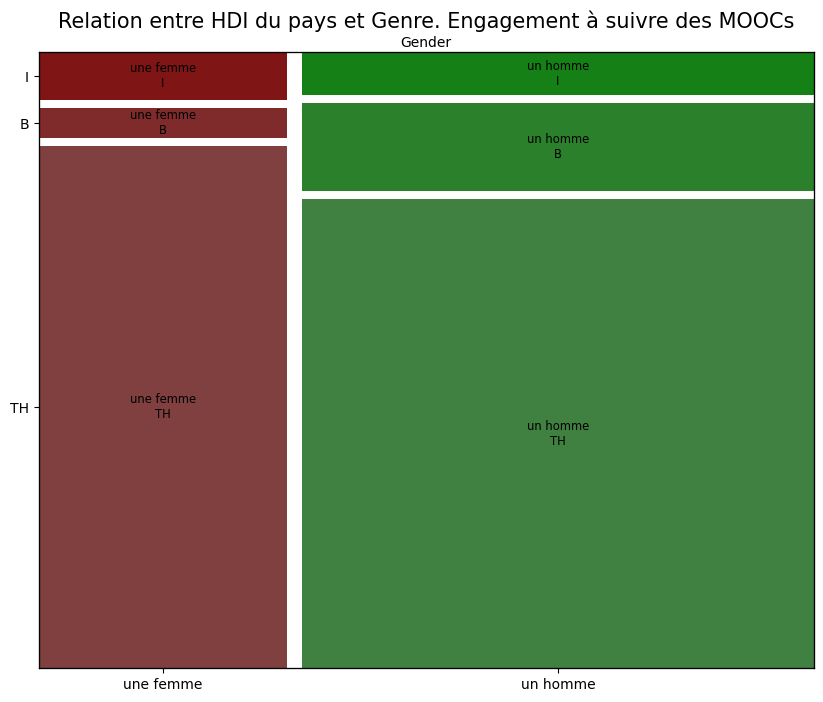

In [108]:
# Mosaic plot sans résidus
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.contingency_tables import Table
import matplotlib.pyplot as plt

# Create a new figure with a defined size
fig, ax = plt.subplots(figsize=(10, 8))

# Create the mosaic plot
mosaic(df, ['Gender','HDI'], gap=0.02, ax=ax)

# Customize the plot
plt.title('Relation entre HDI du pays et Genre. Engagement à suivre des MOOCs', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('HDI du pays')

plt.show()


In [109]:
# Test de student. Nb de vidéos vues et Genre
# distribution a priori normale
# hypothèse nulle : (Moy. nb video homme - Moy. nb video femme) = 0

import scipy.stats as stats

# Diviser la colonne HDI en deux groupes pour Genre = un homme ou une femme
groupe_1 = df[df["Gender"]=="un homme"]['Nb_Videos_Visionnees']
groupe_2 = df[df['Gender']=="une femme"]['Nb_Videos_Visionnees']

# Effectuer le test de Student
t_statistic, p_value = stats.ttest_ind(groupe_1,groupe_2)

# Afficher les résultats
print("Statistique de test :", t_statistic)
print("Valeur de p :", p_value)


Statistique de test : -3.8069653029331483
Valeur de p : 0.00014160623112279648


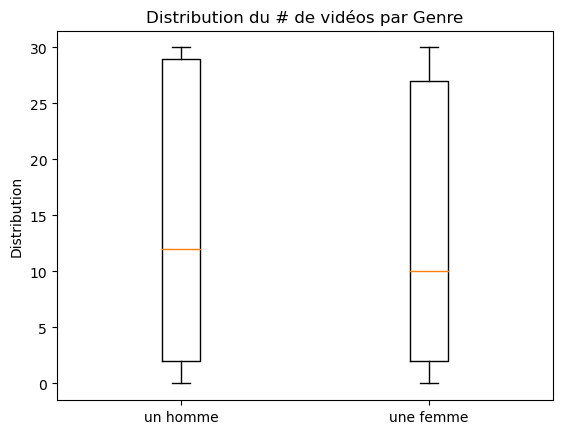

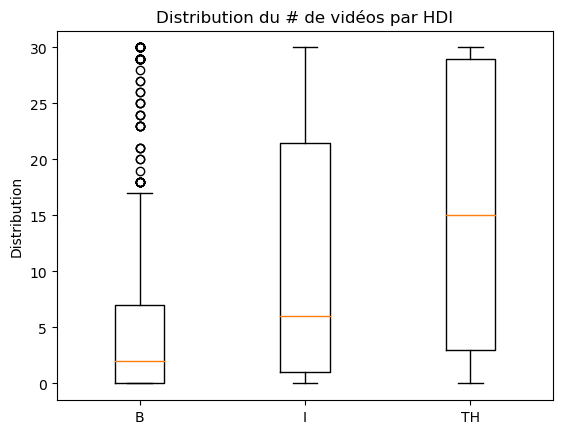

In [110]:
# Création des 2 groupes Nb vidéos pour homme et femme
#print(df_small)

une_femme = df[df["Gender"]=="une femme"]["Nb_Videos_Visionnees"]
un_homme = df[df["Gender"]=="un homme"]["Nb_Videos_Visionnees"]

list_of_tuples_gender = list(zip(une_femme,un_homme))
df_genre = pd.DataFrame(list_of_tuples_gender, columns=["une femme","un homme"])
#print(df_genre)

hdi_b = df[df["HDI"]=="B"]["Nb_Videos_Visionnees"]
hdi_i = df[df["HDI"]=="I"]["Nb_Videos_Visionnees"]
hdi_th = df[df["HDI"]=="TH"]["Nb_Videos_Visionnees"]
list_of_tuples_hdi = list(zip(hdi_b,hdi_i, hdi_th))
df_vhdi = pd.DataFrame(list_of_tuples_hdi, columns=["hdi_b","hdi_i","hdi_th"])
#print(df_vhdi)


# Distribution normale ou pas pour HDI Gender, avec boxplot
fig1,ax1 = plt.subplots()
ax1.boxplot(df_genre)
ax1.set_title("Distribution du # de vidéos par Genre")
ax1.set_ylabel("Distribution")
plt.xticks(ticks = (1,2) ,labels = ["un homme","une femme"])
fig2,ax2 = plt.subplots()
ax2.boxplot(df_vhdi)
ax2.set_title('Distribution du # de vidéos par HDI')
ax2.set_ylabel('Distribution')
plt.xticks(ticks = (1,2,3) ,labels = ["B","I","TH"])
plt.show()

In [113]:
# calcul des variances des populations

import statistics
var_videos_visionnees_hommes = statistics.variance(group_videos_hommes)
print("Variance des videos visionnées par des hommes: ", round(var_videos_visionnees_hommes,2))

var_videos_visionnees_femmes = statistics.variance(group_videos_femmes)
print("Variance des videos visionnées par des femmes: ", round(var_videos_visionnees_femmes,2))

var_videos_visionnees_hdi_b = statistics.variance(hdi_b)
print("Variance des videos visionnées par hdi bas: ", round(var_videos_visionnees_hdi_b,2))

var_videos_visionnees_hdi_i = statistics.variance(hdi_i)
print("Variance des videos visionnées par hdi bas: ", round(var_videos_visionnees_hdi_i,2))

var_videos_visionnees_hdi_th = statistics.variance(hdi_th)
print("Variance des videos visionnées par hdi bas: ", round(var_videos_visionnees_hdi_th,2))



Variance des videos visionnées par des hommes:  137.34
Variance des videos visionnées par des femmes:  140.68
Variance des videos visionnées par hdi bas:  79.5
Variance des videos visionnées par hdi bas:  127.78
Variance des videos visionnées par hdi bas:  137.77


# Vérification des hypothèses pour le test paramétrique.

Nous concluons que les variances sont similaires.

In [144]:
# Test de Student sur 2 populations
import scipy.stats as stats
stats.ttest_ind(group_videos_hommes, group_videos_femmes)


Ttest_indResult(statistic=-3.7828059599346706, pvalue=0.00015606501583036533)

# Vérification des hypothèses pour le test paramétrique.

Test de Student sur les variables Nb_Videos_Visionnees et Gender. Pour déterminer leur niveau d’indépendance. Hypothèse nulle = (Moyenne des vidéos visionnées par les hommes – Moyenne des vidéos visionnées par les femmes) = 0
Vérification des prérequis : 1) Distribution normale ou échantillons de grande taille 2) Homogénéité des variances 3) Indépendance des échantillons

Le test de Student est un test paramétrique. Ici les prérequis ne sont pas respectés (voir les indications ci-après) mais le test est réalisé malgré tout comme demandé.

Les distributions ne sont pas « normales » car la médiane n’est pas située entre le premier et le troisième quartile.

On suppose que les populations de vidéos visionnées par les femmes ou les hommes ont été mesurées aléatoirement. Les valeurs sont continues et bornées (min : 0, max : environ 30).

Le test de Student pour ces 2 populations donne un résultat négatif (-3.74) et une p-value inférieure à 0.001.

Résultat
Ici, avec des prérequis non respectés, on trouve que l’hypothèse nulle (Moyenne vidéos visionnées par les hommes – Moyenne vidéo visionnées par les femmes) = 0 est malgré tout respectée avec un fort niveau de confiance (p-value < 0.001).



In [145]:
# Test non paramétrique U de Mann-Whitney

stats.mannwhitneyu(group_videos_hommes,group_videos_femmes, use_continuity=True, alternative="less")


MannwhitneyuResult(statistic=8711923.0, pvalue=0.00021673578234605281)

Utilisez une régression linéaire, avec un test de corrélation de Pearson, puis
de Spearman, pour établir le lien entre nombre de quiz réalisés et nombre de
vidéos visionnées. Faites un scatterplot pour représenter ce lien.

moyenne  1.970293768936899
min :  0
max :  5
15182
15182
Corrélation de Pearson  0.8065703633633725
Pearson p-value  0.0
Corrélation de Spearman  0.8011244805840398
Spearman p-value  0.0


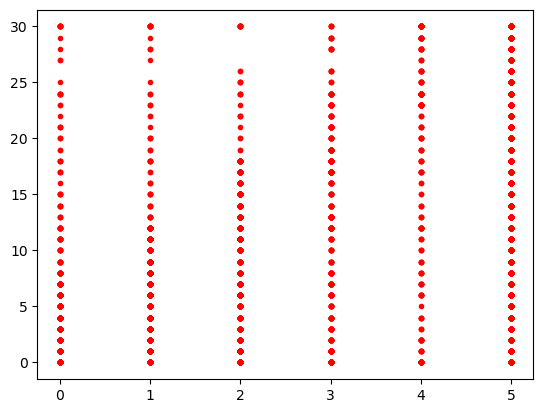

In [147]:
# test de corrélation de Pearson

# création de 2 séries pour les # de quiz et # de vidéos à partir de df_small
nb_quiz = df["Nb_Quizz_Realises"]
nb_videos = df["Nb_Videos_Visionnees"]

# stats sur nb_quiz
print("moyenne ", nb_quiz.mean())
print("min : ", nb_quiz.min())
print("max : ", nb_quiz.max())

# vérification que la longeur est la même pour les 2 séries
print(len(nb_quiz))
print(len(nb_videos))

# corr de Pearson
(stats_pearson,p_value_pearson) = stats.pearsonr(nb_quiz,nb_videos)
print("Corrélation de Pearson ", stats_pearson)
print("Pearson p-value ", p_value_pearson)

# corr de Spearman
(stats_spearman, p_value_spearman) = stats.spearmanr(nb_quiz,nb_videos)
print("Corrélation de Spearman ", stats_spearman)
print("Spearman p-value ", p_value_spearman)

# illustration par un scatterplot
fig1,ax1 = plt.subplots()
ax1.scatter(nb_quiz,nb_videos,marker=".", color="red")
plt.show()

In [168]:
# ANOVA a deux facteurs. Nb videos visionnees en fonction de Gender et HDI

# import bibliothèque
import statsmodels.formula.api as statsapi
import statsmodels as stats
#df_pivot_VGH = df_pivot_HDI_Gender.transpose()
print((df[["Nb_Videos_Visionnees","HDI","Gender"]]))

# modèle OLS fitté, sans interaction
model_ols_VGH = statsapi.ols("Nb_Videos_Visionnees ~ C(HDI) + C(Gender)", data=df).fit()

# modèle OLS fitté, avec interaction
model_ols_VGH_inter = statsapi.ols("Nb_Videos_Visionnees ~ C(HDI) * C(Gender)", data=df).fit()

# passer le modèle ols à anova
result_anova = stats.api.stats.anova_lm(model_ols_VGH)
print(result_anova)

result_anova_inter = stats.api.stats.anova_lm(model_ols_VGH_inter)
print(result_anova_inter)


       Nb_Videos_Visionnees  HDI     Gender
0                         0  NaN        NaN
1                         1   TH  une femme
2                        30   TH  une femme
3                         1   TH  une femme
4                         0    B  une femme
...                     ...  ...        ...
15177                     2    B   un homme
15178                     0  NaN        NaN
15179                     0  NaN        NaN
15180                     1  NaN        NaN
15181                     0  NaN        NaN

[15182 rows x 3 columns]
               df        sum_sq       mean_sq           F         PR(>F)
C(HDI)        2.0  7.597238e+04  37986.189851  291.632361  2.008901e-123
C(Gender)     1.0  5.743061e+01     57.430606    0.440913   5.066990e-01
Residual   8947.0  1.165380e+06    130.253685         NaN            NaN
                      df        sum_sq       mean_sq           F         PR(>F)
C(HDI)               2.0  7.597238e+04  37986.189851  291.664690  1.952658